# Correlação da Carteira

In [1]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime

%matplotlib inline

ds_yahoo = 'yahoo'

last_year = datetime.datetime.now().year - 1
start = datetime.datetime.now().replace(year=last_year)
end = datetime.datetime.now()

### Carteira de ações

In [2]:
tickers = ['ITUB4.SA', 'ABEV3.SA', 'USIM5.SA', 'FLRY3.SA', 
           'PSSA3.SA', 'TIET4.SA', 'LEVE3.SA', 'WHRL3.SA',
           'NOBL', 'JNJ', 'AMZN', 'M', 'LB', 'IAU']

### Calculando a variação diária de cada ação da carteira

In [3]:
prices = pd.DataFrame()

for b in tickers:
    prices[b] = prices[b] = web.DataReader(b, ds_yahoo, start, end)['Adj Close']

log_returns = np.log(prices / prices.shift(1))
correlacao = log_returns.corr()

### Mapa de calor

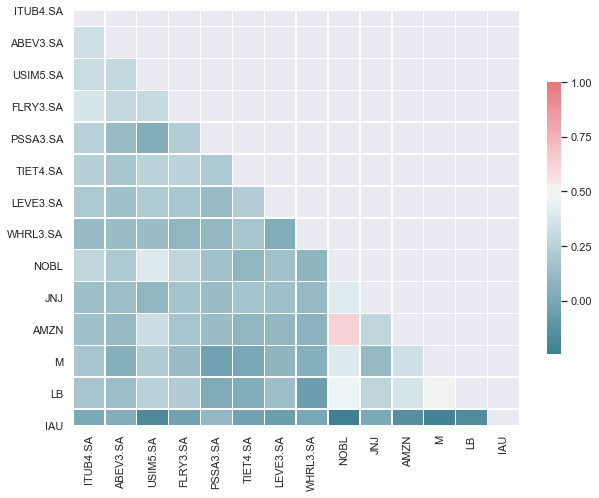

In [9]:
sns.set()

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(correlacao, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlacao, mask=mask, cmap=cmap, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Tabela de correlação

In [11]:
correlacao

,ITUB4.SA,ABEV3.SA,USIM5.SA,FLRY3.SA,PSSA3.SA,TIET4.SA,LEVE3.SA,WHRL3.SA,NOBL,JNJ,AMZN,M,LB,IAU
ITUB4.SA,1.000000,0.344502,0.316884,0.367409,0.257204,0.242771,0.199116,0.113785,0.283222,0.144194,0.151353,0.187342,0.177682,0.010823
ABEV3.SA,0.344502,1.000000,0.294579,0.291370,0.123617,0.184656,0.158130,0.134621,0.207183,0.140616,0.116439,0.048840,0.140138,0.046249
USIM5.SA,0.316884,0.294579,1.000000,0.307777,0.048415,0.257554,0.211627,0.131689,0.400952,0.095222,0.324686,0.220058,0.247569,-0.179015
FLRY3.SA,0.367409,0.291370,0.307777,1.000000,0.228573,0.266532,0.192371,0.092518,0.277753,0.174263,0.177548,0.125338,0.219658,-0.026965
PSSA3.SA,0.257204,0.123617,0.048415,0.228573,1.000000,0.204791,0.130953,0.104738,0.162449,0.134219,0.132522,-0.024457,0.021920,0.105793
TIET4.SA,0.242771,0.184656,0.257554,0.266532,0.204791,1.000000,0.232155,0.185733,0.089262,0.173544,0.096516,-0.001866,0.031143,-0.031431
LEVE3.SA,0.199116,0.158130,0.211627,0.192371,0.130953,0.232155,1.000000,0.028629,0.163695,0.152055,0.100638,0.082621,0.140397,-0.049908
WHRL3.SA,0.113785,0.134621,0.131689,0.092518,0.104738,0.185733,0.028629,1.000000,0.083622,0.114821,0.068741,0.049210,-0.045160,0.003255
NOBL,0.283222,0.207183,0.400952,0.277753,0.162449,0.089262,0.163695,0.083622,1.000000,0.408916,0.628321,0.405573,0.462141,-0.242788
JNJ,0.144194,0.140616,0.095222,0.174263,0.134219,0.173544,0.152055,0.114821,0.408916,1.000000,0.287998,0.113466,0.269765,0.009782
